In [20]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.integrate import quad

%matplotlib inline
import datetime
import matplotlib.dates as mdates
import re
import io_utils #custom wrapper for pytables
import matplotlib as mpl
import madrigalWeb.madrigalWeb
import os

In [21]:
def visitor_func(name, node):
    if isinstance(node, h5py.Group):
        print('--------------------------------------------')
        print(node.name, 'is a Group')
    elif isinstance(node, h5py.Dataset):
        if (node.dtype == 'object') :
            print ('\t', node.name, ' is an object Dataset')
        else:
            print('\t \t', node.name, ' is a Dataset')   
    else:
        print('\t \t \t', node.name, ' is an unknown type')  

In [22]:
# read HDF5 file
# Download the data file that we need to run these examples

# filename = '20250722.014_lp_5min-fitcal.h5'
# filename = '20250722.014_lp_5min-fitcal.h5'
filename = '20250722.014_lp_20min-fitcal.h5'

if not os.path.exists(filename):
    import urllib.request
    url= 'https://data.amisr.com/database/dbase_site_media/PFISR/Experiments/20250722.014/DataFiles/' 
    url = url + filename
    
    print('Downloading data file...')
    urllib.request.urlretrieve(url,filename)

    print('...Done!')
hf = h5py.File(filename, 'r')

In [23]:
with h5py.File(filename, 'r') as h5f:
    h5f.visititems(visitor_func) 

	 	 /BeamCodes  is a Dataset
--------------------------------------------
/Calibration is a Group
	 	 /Calibration/CalDataBeam  is a Dataset
	 	 /Calibration/CalDate  is a Dataset
	 	 /Calibration/CalFileBeam  is a Dataset
	 	 /Calibration/CalibrationMethod  is a Dataset
--------------------------------------------
/FittedParams is a Group
	 	 /FittedParams/Altitude  is a Dataset
	 	 /FittedParams/Errors  is a Dataset
--------------------------------------------
/FittedParams/FitInfo is a Group
	 	 /FittedParams/FitInfo/chi2  is a Dataset
	 	 /FittedParams/FitInfo/dof  is a Dataset
	 	 /FittedParams/FitInfo/fitcode  is a Dataset
	 	 /FittedParams/FitInfo/nfev  is a Dataset
	 	 /FittedParams/Fits  is a Dataset
	 	 /FittedParams/IonMass  is a Dataset
	 	 /FittedParams/Ne  is a Dataset
	 	 /FittedParams/Noise  is a Dataset
	 	 /FittedParams/Range  is a Dataset
	 	 /FittedParams/dNe  is a Dataset
--------------------------------------------
/Geomag is a Group
	 	 /Geomag/Altitude  is a Dat

In [24]:
# filename= '20250722.014_lp_5min-fitcal.h5'
hf = h5py.File(filename, 'r')
ranges = np.nan_to_num(np.array(hf['FittedParams/Altitude']),copy=False)*1e-3
#print(ranges[1])
ne = np.nan_to_num(np.array(hf['FittedParams/Ne']),copy=False)
#ne[np.isnan(ne)] = 0
hf.close()

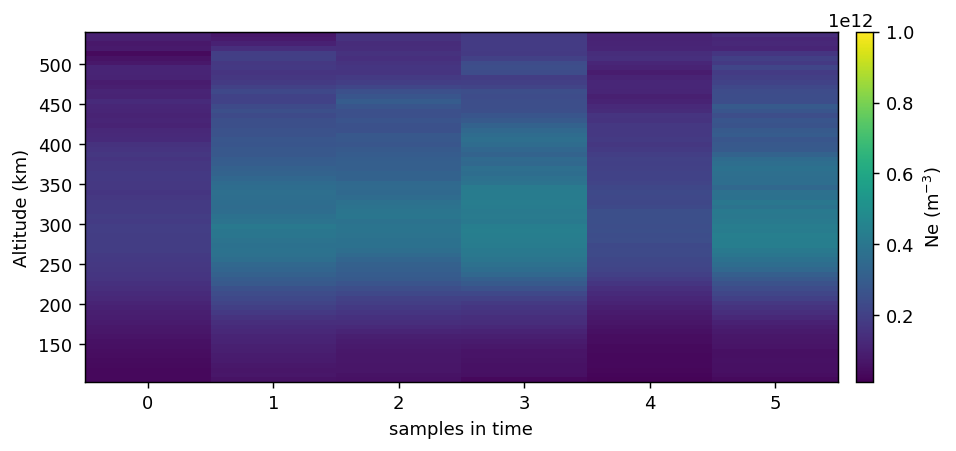

In [25]:
beamNum = 0
#plt.plot(ranges[beamNum], ne[0,beamNum,:].T)
fig,ax=plt.subplots(dpi=130, figsize=(9,3.5))
clrs = ax.pcolormesh(np.arange(len(ne[:,0,0])),ranges[beamNum][:-1],ne[:,beamNum,:-1].T,\
                     vmin=1e10,vmax=1e12, shading='nearest')
#ax.set_xlim([mdates.date2num(datetime.datetime(2025,7,20,0,0,0)),
#             mdates.date2num(datetime.datetime(2025,7,22,0,0,0))])
#ax.set_ylim([ranges[beamNum][0],np.max(ranges[beamNum])])
#locator = mdates.AutoDateLocator(minticks=8, maxticks=9)
#formatter = mdates.ConciseDateFormatter(locator)
#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('samples in time')
ax.set_ylabel('Altitude (km)')
# ax.set_title('Barker Code Uncorrected Ne')

cb=fig.colorbar(clrs, pad=0.02)
cb.set_label('Ne (m$^{-3}$)')

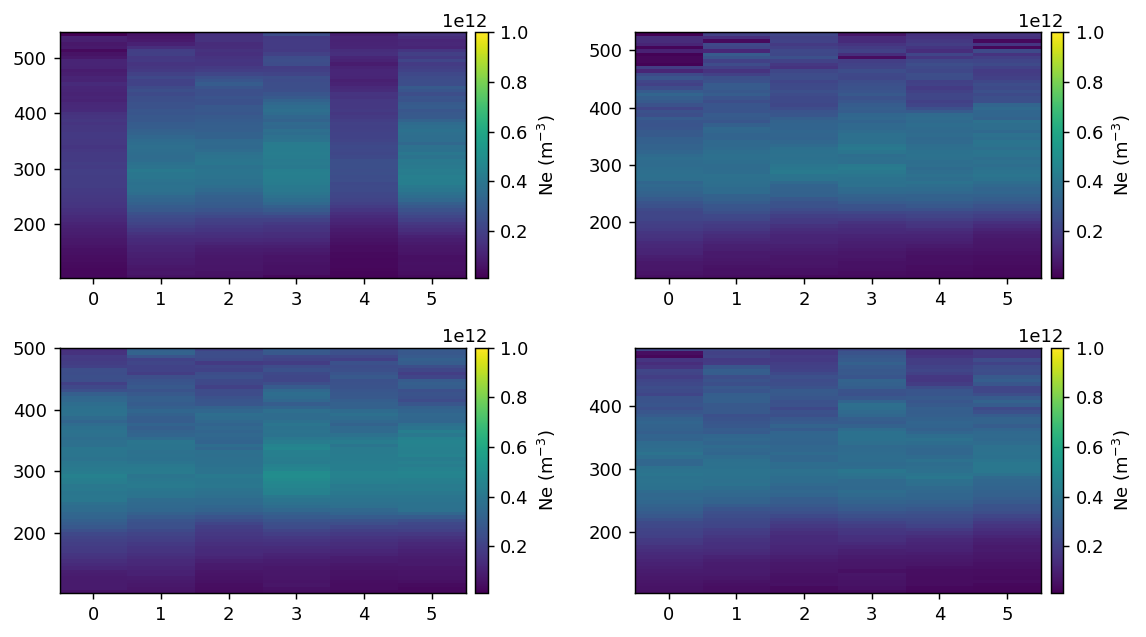

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2,dpi=130, figsize=(9,5))

# 'axs' is now a 2D array of Axes objects.
# You can access individual subplots using array indexing, e.g., axs[row, col].

# BEAM = 0
beamNum = 0
clrs = axs[0,0].pcolormesh(np.arange(len(ne[:,0,0])),ranges[beamNum][:],ne[:,beamNum,:].T,\
                     vmin=1e10,vmax=1e12, shading='nearest')

cb=fig.colorbar(clrs, pad=0.02)
cb.set_label('Ne (m$^{-3}$)')


# BEAM = 1
beamNum = 1
clrs = axs[0,1].pcolormesh(np.arange(len(ne[:,0,0])),ranges[beamNum][:-1],ne[:,beamNum,:-1].T,\
                     vmin=1e10,vmax=1e12, shading='nearest')
cb=fig.colorbar(clrs, pad=0.02)
cb.set_label('Ne (m$^{-3}$)')


# BEAM = 2
beamNum = 2
clrs = axs[1,0].pcolormesh(np.arange(len(ne[:,0,0])),ranges[beamNum][:-2],ne[:,beamNum,:-2].T,\
                     vmin=1e10,vmax=1e12, shading='nearest')
cb=fig.colorbar(clrs, pad=0.02)
cb.set_label('Ne (m$^{-3}$)')


# BEAM = 3
beamNum = 3
clrs = axs[1,1].pcolormesh(np.arange(len(ne[:,0,0])),ranges[beamNum][:-3],ne[:,beamNum,:-3].T,\
                     vmin=1e10,vmax=1e12, shading='nearest')
cb=fig.colorbar(clrs, pad=0.02)
cb.set_label('Ne (m$^{-3}$)')


# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

In [27]:
ranges[1]

array([105.90699503, 111.76258856, 117.61843012, 123.4745302 ,
       129.33088439, 135.187492  , 141.04435236, 146.90146477,
       152.75882112, 158.61644308, 164.47430763, 170.33241409,
       176.19078417, 182.04939483, 187.90824541, 193.76735761,
       199.62670096, 205.48629716, 211.34614557, 217.20622317,
       223.06655167, 228.92713042, 234.78792896, 240.64899139,
       246.51028724, 252.37181587, 258.23359156, 264.09562114,
       269.95785922, 275.82034993, 281.68307772, 287.54605689,
       293.40924206, 299.27269229, 305.13634728, 311.00025117,
       316.86438843, 322.72875845, 328.59336063, 334.45819434,
       340.32325899, 346.18855398, 352.0540787 , 357.91983255,
       363.78580001, 369.65202527, 375.51846296, 381.38511247,
       387.25201801, 393.11913421, 398.98646047, 404.85404102,
       410.72183047, 416.58982824, 422.45807855, 428.32652111,
       434.19521507, 440.06411505, 445.93322049, 451.80256069,
       457.67212015, 463.54189831, 469.41190954, 475.28

In [28]:
ranges[2]

array([104.93567946, 110.43957064, 115.94433473, 121.44996601,
       126.95646229, 132.46382138, 137.97204108, 143.48111222,
       148.99105365, 154.50184217, 160.01347563, 165.52597292,
       171.03931085, 176.55348729, 182.06852115, 187.58438223,
       193.10108949, 198.61864081, 204.13701303, 209.65622512,
       215.17627498, 220.69713244, 226.21883757, 231.74136021,
       237.26469828, 242.78886379, 248.31386172, 253.83964784,
       259.36626231, 264.89368902, 270.42194004, 275.95097112,
       281.48083655, 287.01147803, 292.54293578, 298.07519373,
       303.60824991, 309.14210233, 314.67674902, 320.21218801,
       325.74841734, 331.28543507, 336.82323923, 342.3618138 ,
       347.90119913, 353.44135099, 358.98226746, 364.52398893,
       370.06647118, 375.6097123 , 381.15375272, 386.69854821,
       392.24409688, 397.79043919, 403.33751681, 408.88538434,
       414.43399756, 419.9833546 , 425.53348186, 431.08436336,
       436.63599728, 442.1883959 , 447.741515  , 453.29